In [1]:
pip install sunpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install aiapy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import sunpy #solar data analysis 
import sunpy.map
import aiapy #images 
import aiapy.data.sample as sample_data
import matplotlib.pyplot as plt
from aiapy.calibrate import normalize_exposure, register, update_pointing

In [4]:
dir(sample_data) #inside direcetory, images of full disc sun taken in 3 diff wavelengths  

['AIA_094_IMAGE',
 'AIA_171_IMAGE',
 'AIA_193_IMAGE',
 'Path',
 '_SAMPLE_FILES',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_key',
 'download_sample_data',
 'f',
 'file_dict',
 'file_list',
 'filename',
 'files',
 'keyname',
 'name',
 'sys']

In [5]:
sample_data.files

[WindowsPath('C:/Users/pankh/AppData/Local/sunpy/aiapy/aia_lev1_94a_2019_01_01t00_00_11_12z_image_lev1.fits'),
 WindowsPath('C:/Users/pankh/AppData/Local/sunpy/aiapy/aia_lev1_193a_2013_03_15t12_01_06_84z_image_lev1.fits'),
 WindowsPath('C:/Users/pankh/AppData/Local/sunpy/aiapy/aia_lev1_171a_2019_01_01t00_00_09_35z_image_lev1.fits')]

In [6]:
sample_data.name

'aia_lev1_171a_2019_01_01t00_00_09_35z_image_lev1.fits'

In [7]:
sample_data.AIA_171_IMAGE #lev1= image not calibrated 

'C:\\Users\\pankh\\AppData\\Local\\sunpy\\aiapy\\aia_lev1_171a_2019_01_01t00_00_09_35z_image_lev1.fits'

In [4]:
from astropy.io import fits

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2019-01-01 00:00:09
Exposure Time,2.000156 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.599489 0.599489] arcsec / pix
Reference Pixel,[2055.310059 2045.709961] pix

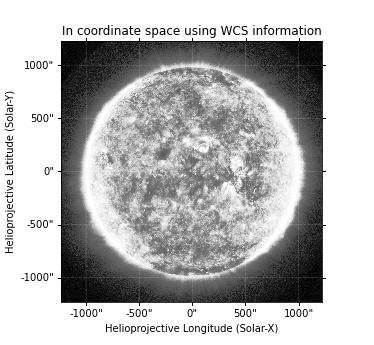
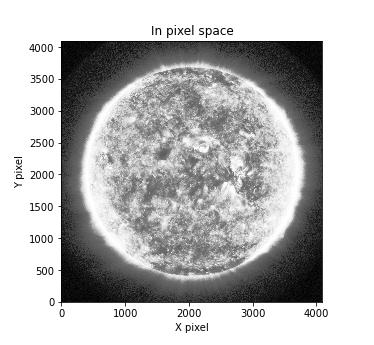
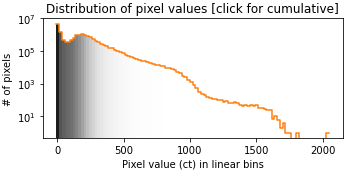
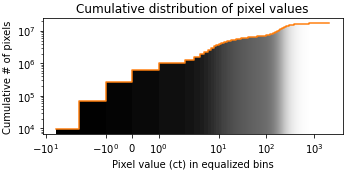

In [5]:
m = sunpy.map.Map(sample_data.AIA_171_IMAGE)
m #helioprojective, earth out of the screen along sun's centre 
#1 arc sec=720km on sun
#centre of ccd=2048 but centre of sun=2045: centre not coinciding (linear transformations to centre them) 

In [6]:
m_updated_pointing = update_pointing(m)

In [7]:
m_registered = register(m_updated_pointing)

In [8]:
print(m_registered.scale)
print(m_registered.rotation_matrix)
#rotation matrix, solar north is now corrected (sum of row=0)

SpatialPair(axis1=<Quantity 0.6 arcsec / pix>, axis2=<Quantity 0.6 arcsec / pix>)
[[1. 0.]
 [0. 1.]]


Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2019-01-01 00:00:09
Exposure Time,2.000156 s
Dimension,[4094. 4094.] pix
Coordinate System,helioprojective
Scale,[0.6 0.6] arcsec / pix
Reference Pixel,[2046.5 2046.5] pix

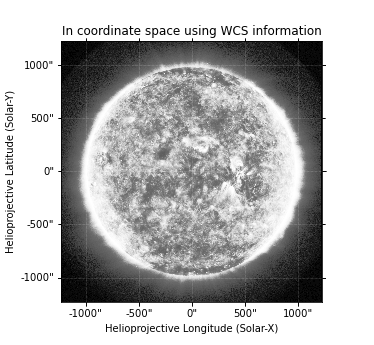
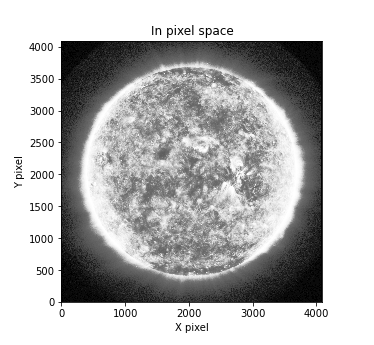
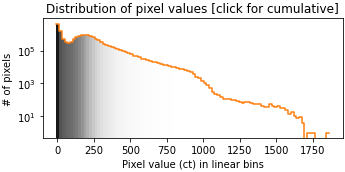
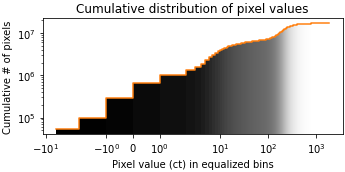

In [9]:
m_registered #lev1.5 image or lev2...better calibrated 

In [14]:
dir(m_registered)

['__abstractmethods__',
 '__add__',
 '__array_ufunc__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_abc_impl',
 '_as_mpl_axes',
 '_base_name',
 '_check_axes',
 '_coordinate_frame_name',
 '_data',
 '_date_obs',
 '_default_carrington_longitude',
 '_default_dsun',
 '_default_heliographic_latitude',
 '_default_heliographic_longitude',
 '_default_observer_coordinate',
 '_default_time',
 '_get_cmap_name',
 '_get_date',
 '_get_lon_lat',
 '_mask',
 '_meta',
 '_meta_hash',
 '_new_instance',
 '_new_instance_from_op',
 '_nickname',
 '_parse

In [15]:
print(m_registered.date)
print(m_registered.detector)
print(m_registered.dimensions)

2019-01-01T00:00:09.350
AIA
PixelPair(x=<Quantity 4094. pix>, y=<Quantity 4094. pix>)


In [16]:
im171=m_registered.data #changing map to 2d array
print(im171.shape)

(4094, 4094)


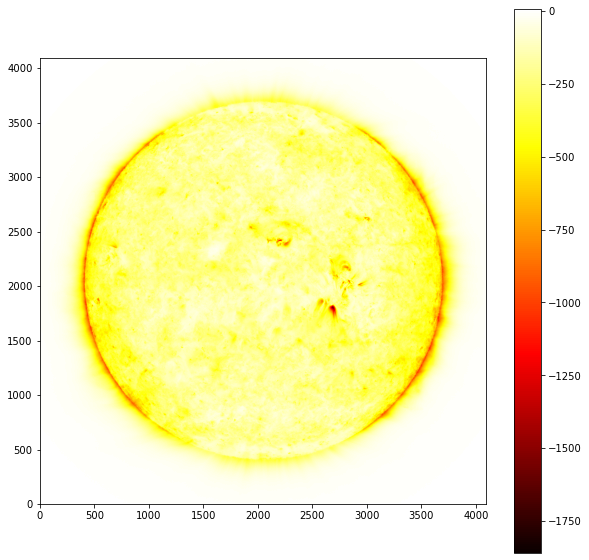

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(im171*(-1),cmap='hot',origin='lower')
plt.colorbar()
plt.show()
#shows density of pixels 
#negative of the image

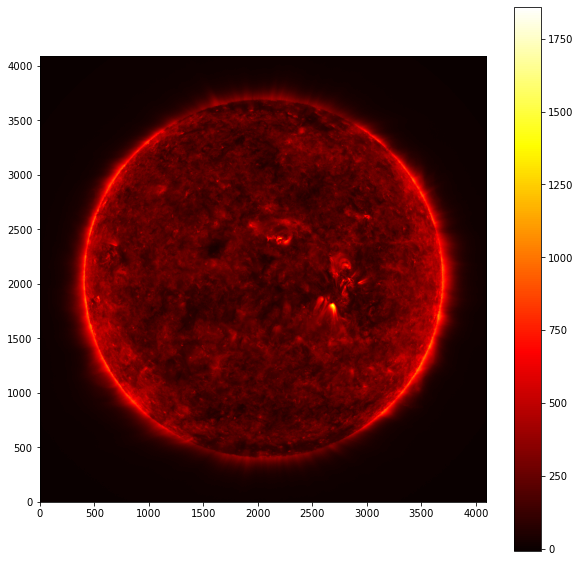

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(im171,cmap='hot',origin='lower') #without lower our origin is reversed 
plt.colorbar()
plt.show()
#shows density of pixels 
#color scale = v

map is also like a dir describing characteristics of the image: data and date etc. m_registered is not an array its a map.  

enhancing the image

# Zooming into image

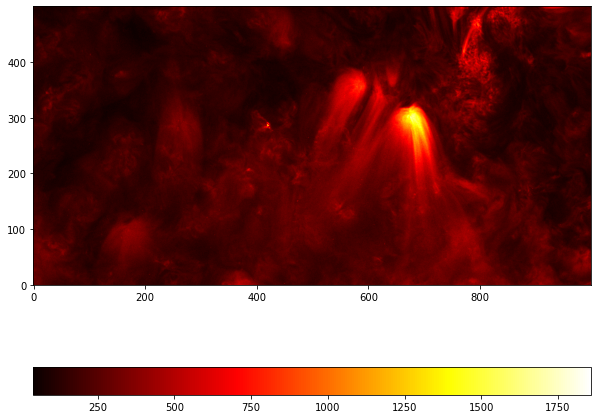

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(im171[1500:2000,2000:3000],cmap='hot',origin='lower') #x and y reversed 
plt.colorbar(orientation='horizontal')
plt.show()

# Image thresholding

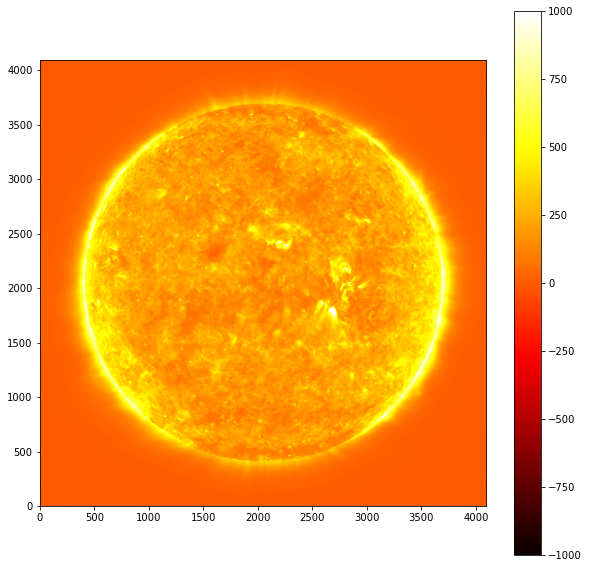

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(im171,cmap='hot',origin='lower',vmin=-1000,vmax=1000) # ancy color value lower than 0=0, higher than 1000=1000 where 0 and 1000 are our vmin and vmax (units of photon data points)
plt.colorbar()
plt.show()

# Gamma transformation

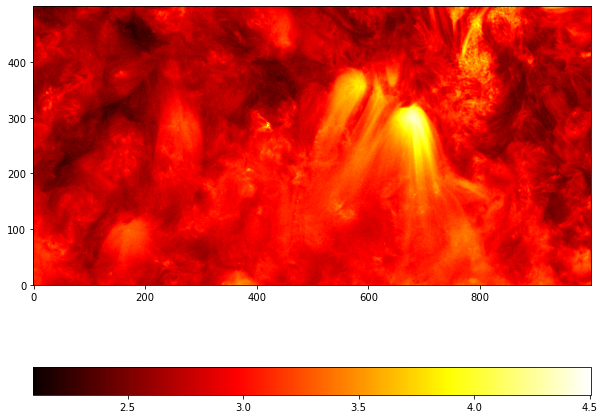

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(im171[1500:2000,2000:3000]**0.2,cmap='hot',origin='lower') #gamma<1, faint features enhanced 
plt.colorbar(orientation='horizontal')
plt.show()

# Edge detection

In [10]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [24]:
import cv2
sobel_im = cv2.Sobel(src=im171[1500:2000,2000:3000], ddepth=cv2.CV_64F, dx=1, dy=1, ksize=11) #dx, dy edge detection in both directions for dx=dy=1, kernel size should be odd (higher the ksize thicker the edges)

ModuleNotFoundError: No module named 'cv2'

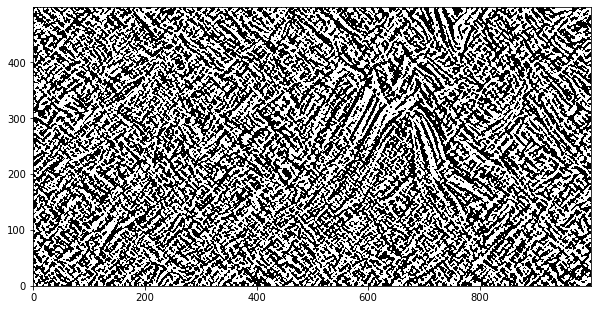

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(sobel_im,cmap='Greys',origin='lower',vmin=0,vmax=0.03) # shadow brightness obnly in y direction 

# Unsharp Masking

In [55]:
from skimage.filters import unsharp_mask #masking features that are not sharp, high freq filtering 

In [64]:
a=im171[1500:2000,2000:3000]
sharp_im = unsharp_mask(a, radius=2, amount=10) #radius is sigma of convulation, amount tells how much enhancement  

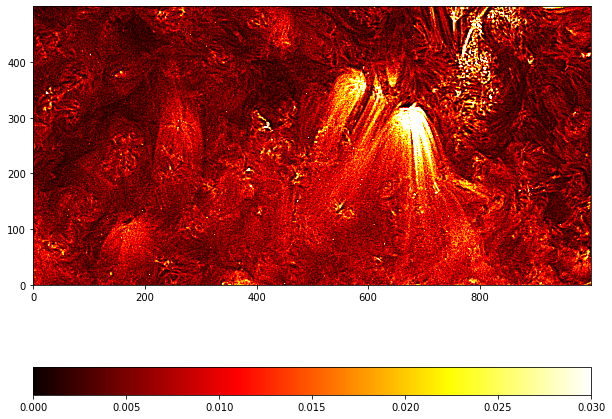

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(sharp_im,cmap='hot',origin='lower',vmin=0,vmax=0.03)
#plt.imshow(hf_im,cmap='hot',origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()

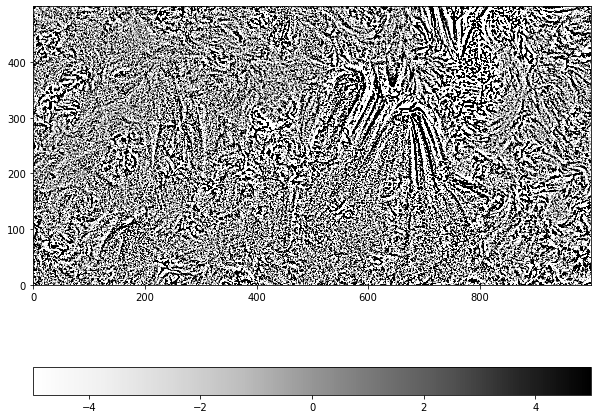

In [70]:
im_blurred = cv2.GaussianBlur(im171,(11,11),2)
#gaussian filter, blurring entire eimage, 2 is sigma of gaussian (very narrow ), 11 by 11 size of kernel 
#kernel= size of array, gaussian should fit the kernel , ksize>sigma
#kernel should be odd since centre value is at the peak or else we'll have two centres 
hf_im=im171-im_blurred #subtracting this from high freq image 
plt.figure(figsize=(10,10))
plt.imshow(hf_im[1500:2000,2000:3000],cmap='Greys',origin='lower',vmin=-5,vmax=5)
#plt.imshow(hf_im,cmap='hot',origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()
#better than edge detection
#adding several hfs we'll get multisize gaussian normal something